In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('spam_sms.csv')

In [3]:
df.sample(5)

,v1,v2
3523,ham,Yeah that'd pretty much be the best case scenario
5433,ham,You're gonna have to be way more specific than...
1893,ham,Good Morning plz call me sir
3032,ham,"Aight, lemme know what's up"
2544,ham,She is our sister.. She belongs 2 our family.....


In [4]:
df.shape

(5572, 2)

 1. Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
#renaming the column name
df.rename(columns={'v1':'target' , 'v2':'text'}, inplace=True)
df.sample(5)

,target,text
2177,ham,Oh k :)why you got job then whats up?
2438,ham,I not busy juz dun wan 2 go so early.. Hee..
3327,ham,No we put party 7 days a week and study lightl...
235,ham,I have printed it oh. So &lt;#&gt; come upst...
4184,ham,I'm good. Have you registered to vote?


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])   #ham=0 and spam=1

In [9]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values 
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check for dulpicate value
df.duplicated().sum()

403

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.shape

(5169, 2)

2. EDA 

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()   #this give data about number of hums(0) and spam(1)

target
0    4516
1     653
Name: count, dtype: int64

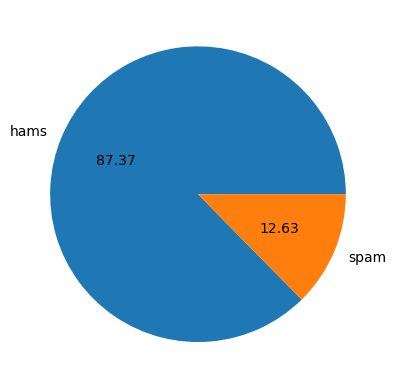

In [16]:
import matplotlib.pyplot as plt 
plt.pie(df['target'].value_counts() , labels=['hams' , 'spam'], autopct="%0.2f")   #representation of hams and spam data in form of pie chart
plt.show()

In [17]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters']= df['text'].apply(len) #counting total characters in every row and it is stored in num_characters column 

In [21]:
#df = df.drop(columns=['num_charcaters'])
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #counting total words in row and stored in the new column (num_words)

In [23]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #counting total sentences in the row and stored in new column (num_sentences)

In [25]:
df.head()

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_words' , 'num_sentence','num_characters']].describe()  #give satistical data 

,num_words,num_sentence,num_characters
count,5169.000000,5169.000000,5169.000000
mean,18.455794,1.965564,78.977945
std,13.324758,1.448541,58.236293
min,1.000000,1.000000,2.000000
25%,9.000000,1.000000,36.000000
50%,15.000000,1.000000,60.000000
75%,26.000000,2.000000,117.000000
max,220.000000,38.000000,910.000000


In [27]:
# satistical data for ham messages
df[df['target'] == 0][['num_words','num_sentence', 'num_characters']].describe()

,num_words,num_sentence,num_characters
count,4516.000000,4516.000000,4516.000000
mean,17.123782,1.820195,70.459256
std,13.493970,1.383657,56.358207
min,1.000000,1.000000,2.000000
25%,8.000000,1.000000,34.000000
50%,13.000000,1.000000,52.000000
75%,22.000000,2.000000,90.000000
max,220.000000,38.000000,910.000000


In [28]:
# satistical data for spam messages
df[df['target'] == 1][['num_words','num_sentence', 'num_characters']].describe()

,num_words,num_sentence,num_characters
count,653.000000,653.000000,653.000000
mean,27.667688,2.970904,137.891271
std,7.008418,1.488425,30.137753
min,2.000000,1.000000,13.000000
25%,25.000000,2.000000,132.000000
50%,29.000000,3.000000,149.000000
75%,32.000000,4.000000,157.000000
max,46.000000,9.000000,224.000000


In [29]:
#above satistical data give analysis that spams messages are larger then ham 
import seaborn as sns

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_characters', ylabel='Count'>

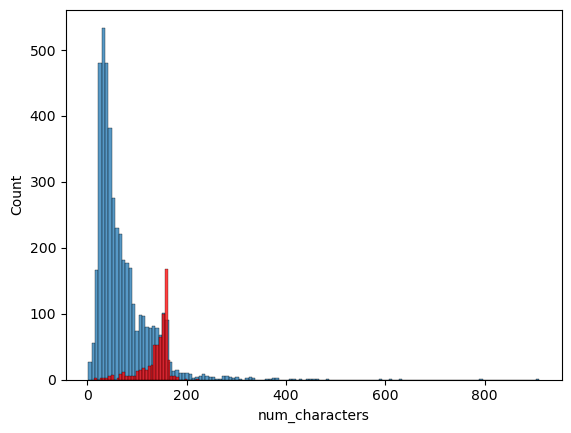

In [30]:
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='num_words', ylabel='Count'>

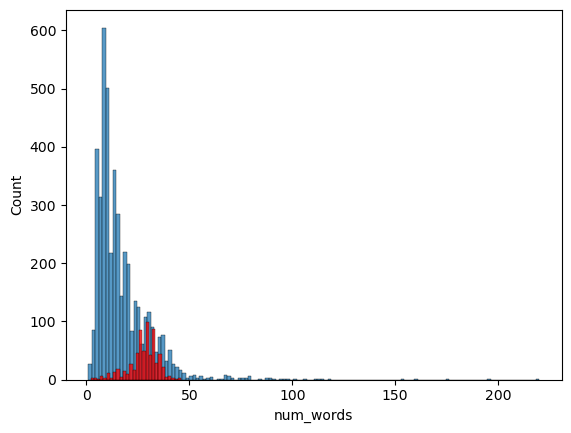

In [31]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


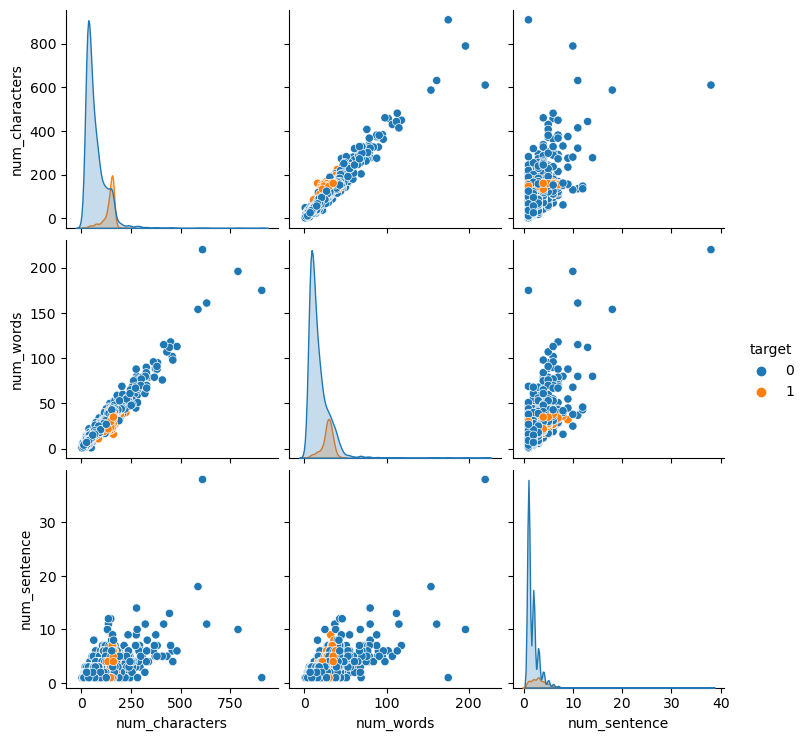

In [32]:
sns.pairplot(df,hue='target')

In [33]:
#sns.heatmap(df.corr(),annot=True)

3. Data preprocessing

In [34]:
import nltk
from nltk.corpus import stopwords
 
nltk.download('stopwords')
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()


In [37]:
def transform_text(text):
    text = text.lower()  #converting all characters to lower 
    text = nltk.word_tokenize(text) #creating list of words 
    y=[]
    for i in text:
        if(i.isalnum()):
            y.append(i)  #removing special characters 

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:  #removing stopwords and punctuation 
            y.append(i)

    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)


In [38]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...")

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
df['tranformed_text'] = df['text'].apply(transform_text)

In [41]:
df.head()

,target,text,num_characters,num_words,num_sentence,tranformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [42]:
from wordcloud import WordCloud

In [43]:
wc=WordCloud(width=50, height=50, min_font_size=10, background_color='white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['tranformed_text'].str.cat(sep=" "))

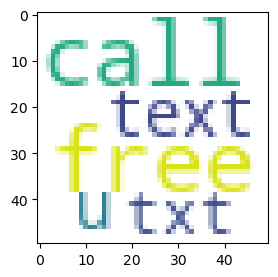

In [45]:
plt.figure(figsize=(10,3))
plt.imshow(spam_wc)   # this will give most common words in spam messages in graphical form 

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['tranformed_text'].str.cat(sep=" "))

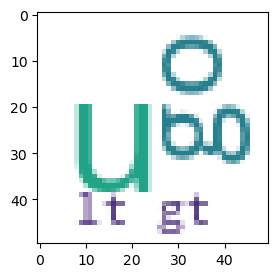

In [47]:
plt.figure(figsize=(10,3))
plt.imshow(ham_wc)   # this will give most common words in ham messages in graphical form 

In [48]:
spam_corpus = []
for msg in df[df['target'] == 1]['tranformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [49]:
len(spam_corpus)

9939

In [50]:
#import seaborn as sns
from collections import Counter 
Counter(spam_corpus).most_common(30)  #top 30 words used in spam messages with its frequence 

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [51]:
ham_corpus = []
for msg in df[df['target'] == 0]['tranformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [52]:
len(ham_corpus)

35404

In [53]:
from collections import Counter
Counter(ham_corpus).most_common(30)   #top 30 most common words in ham messages with its frequence 

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 142),
 ('tell', 133),
 ('make', 129)]

4. model building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer 
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [55]:
X = tfidf.fit_transform(df['tranformed_text']).toarray()  #tranformed text are not in integer so need to convert into vector and then stored in x variable 

In [56]:
X.shape

(5169, 3000)

In [57]:
y = df['target'].values  #target which is already in integer so no need to convert hence it is stored in y variable 

In [58]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [64]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

#by using Tfidf algo and multinomialNB , precision=1.0 which means it is giving complelety true prediction 

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [65]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [66]:
# checking pericision with other ml models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier 

In [67]:
svc = SVC(kernel = 'sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)



In [68]:
clfs = {
    'SVC' : svc,
    'KN'  : knc,
    'NB'  : mnb,
    'DT'  : dtc,
    'LR'  : lrc,
    'RF'  : rfc,
    'AdaBoost' : abc,
    'Bgc' : bc,
    'ETC' : etc,
    'GBDT' : gbdt
}


In [69]:
def train_classifier(clf,X_train, y_train, X_test, y_test):  #function will train classifier on training data 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)    
    precision = precision_score(y_test, y_pred)
    return accuracy , precision



In [70]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9758220502901354, 0.9747899159663865)

In [71]:
# now find accuracy and precision for every model stored in dict 
accuracy_scores=[]
precision_scores = []
for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print("for" , name)
    print("Accuracy", current_accuracy)
    print("Precision", current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for SVC
Accuracy 0.9758220502901354
Precision 0.9747899159663865
for KN
Accuracy 0.9052224371373307
Precision 1.0
for NB
Accuracy 0.9709864603481625
Precision 1.0
for DT
Accuracy 0.9274661508704062
Precision 0.8118811881188119
for LR
Accuracy 0.9584139264990329
Precision 0.9702970297029703
for RF
Accuracy 0.9758220502901354
Precision 0.9829059829059829
for AdaBoost
Accuracy 0.960348162475822
Precision 0.9292035398230089
for Bgc
Accuracy 0.9584139264990329
Precision 0.8682170542635659
for ETC
Accuracy 0.9748549323017408
Precision 0.9745762711864406
for GBDT
Accuracy 0.9468085106382979
Precision 0.9191919191919192


In [72]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [73]:
#model improve
#1.change the max_features parameter of Tfidf

In [74]:
performnace_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

In [75]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accurarcy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000', ascending=False)

In [76]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accurarcy_max_ft_3000,Precision_max_ft_3000
0,KN,0.905222,1.000000,0.905222,1.000000
1,NB,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790
4,ETC,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297
6,AdaBoost,0.960348,0.929204,0.960348,0.929204
7,GBDT,0.946809,0.919192,0.946809,0.919192
8,Bgc,0.958414,0.868217,0.958414,0.868217
9,DT,0.927466,0.811881,0.927466,0.811881


In [77]:
#above dataframe shows that multinomial used previously was best for naive_bayes is best, hence we will use this model for our porject

In [78]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))